<a href="https://colab.research.google.com/github/guifuturedev/portfolio_analista_dados/blob/main/lages_school_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão de Risco de Evasão Escolar em Lages/SC
**Projeto de Análise de Dados & Machine Learning**
Autor: Guilherme Soares

---

## Objetivo
Analisar dados educacionais simulados de Lages/SC e criar um modelo simples de Machine Learning
para prever o risco de evasão escolar.

## Motivação
A evasão escolar é um problema real e relevante na cidade. Identificar escolas/alunos em risco
pode apoiar gestores e secretarias na tomada de decisões.

## Observação importante
Embora este projeto utilize **dados simulados**, eles foram construídos para refletir a estrutura
e variáveis que existiriam em uma base de dados real de Lages.
O notebook está preparado para **receber dados oficiais no futuro**, bastando substituir o CSV de entrada.

In [5]:
# Bibliotecas principais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Configurações de visualização
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

In [6]:
# Simulação de dados de escolas de Lages
dados = {
    "escola": ["Escola A", "Escola B", "Escola C", "Escola D", "Escola E", "Escola F", "Escola G", "Escola H"],
    "alunos_matriculados": [300, 120, 450, 200, 180, 350, 150, 400],
    "internet": [1, 0, 1, 0, 1, 1, 0, 1],
    "biblioteca": [1, 0, 1, 0, 0, 1, 0, 1],
    "quadra": [1, 1, 0, 0, 1, 1, 0, 1],
    "sala_climatizada": [1, 0, 1, 0, 0, 1, 0, 1],
    "banheiro_acessivel": [1, 0, 1, 0, 1, 1, 0, 1],
    "frequencia_media": [0.92, 0.75, 0.88, 0.70, 0.80, 0.95, 0.65, 0.90],
    "ideb_iniciais": [5.5, 4.0, 6.0, 3.5, 4.2, 5.8, 3.0, 6.1],
    "ideb_finais": [5.0, 3.8, 5.7, 3.2, 4.0, 5.5, 2.8, 6.0]
}

df = pd.DataFrame(dados)
df.head()

,escola,alunos_matriculados,internet,biblioteca,quadra,sala_climatizada,banheiro_acessivel,frequencia_media,ideb_iniciais,ideb_finais
0,Escola A,300,1,1,1,1,1,0.92,5.5,5.0
1,Escola B,120,0,0,1,0,0,0.75,4.0,3.8
2,Escola C,450,1,1,0,1,1,0.88,6.0,5.7
3,Escola D,200,0,0,0,0,0,0.70,3.5,3.2
4,Escola E,180,1,0,1,0,1,0.80,4.2,4.0


## Variável alvo: evasão escolar (simulada)

- Criamos a variável `evasao` com base em regras simples que refletem fatores reais de risco:
  - Falta de infraestrutura (internet, biblioteca)
  - Frequência baixa
  - IDEB final baixo
- No futuro, se tivermos dados reais de evasão, esta coluna poderá ser substituída
diretamente pelos registros oficiais.

In [7]:
# Regras simples para simular risco de evasão
def simular_risco(row):
    score = 0
    if row['internet'] == 0:
        score += 1
    if row['biblioteca'] == 0:
        score += 1
    if row['frequencia_media'] < 0.8:
        score += 1
    if row['ideb_finais'] < 4.0:
        score += 1
    return 1 if score >= 2 else 0

df['evasao'] = df.apply(simular_risco, axis=1)
df

,escola,alunos_matriculados,internet,biblioteca,quadra,sala_climatizada,banheiro_acessivel,frequencia_media,ideb_iniciais,ideb_finais,evasao
0,Escola A,300,1,1,1,1,1,0.92,5.5,5.0,0
1,Escola B,120,0,0,1,0,0,0.75,4.0,3.8,1
2,Escola C,450,1,1,0,1,1,0.88,6.0,5.7,0
3,Escola D,200,0,0,0,0,0,0.70,3.5,3.2,1
4,Escola E,180,1,0,1,0,1,0.80,4.2,4.0,0
5,Escola F,350,1,1,1,1,1,0.95,5.8,5.5,0
6,Escola G,150,0,0,0,0,0,0.65,3.0,2.8,1
7,Escola H,400,1,1,1,1,1,0.90,6.1,6.0,0


In [8]:
df.describe()

,alunos_matriculados,internet,biblioteca,quadra,sala_climatizada,banheiro_acessivel,frequencia_media,ideb_iniciais,ideb_finais,evasao
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000
mean,268.750000,0.625000,0.500000,0.625000,0.500000,0.625000,0.81875,4.762500,4.500000,0.375000
std,123.338964,0.517549,0.534522,0.517549,0.534522,0.517549,0.11051,1.227003,1.210667,0.517549
min,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.65000,3.000000,2.800000,0.000000
25%,172.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.73750,3.875000,3.650000,0.000000
50%,250.000000,1.000000,0.500000,1.000000,0.500000,1.000000,0.84000,4.850000,4.500000,0.000000
75%,362.500000,1.000000,1.000000,1.000000,1.000000,1.000000,0.90500,5.850000,5.550000,1.000000
max,450.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.95000,6.100000,6.000000,1.000000


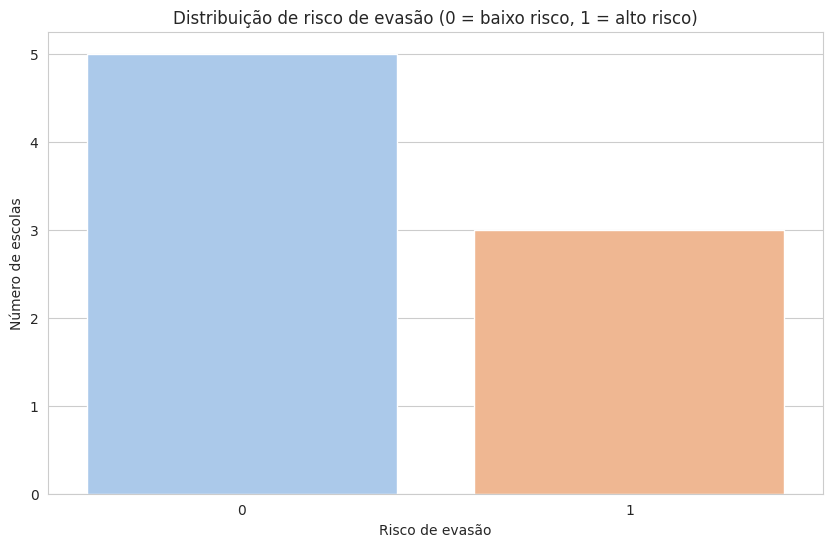

In [9]:
sns.countplot(x='evasao', hue='evasao', data=df, palette='pastel', legend=False)
plt.title('Distribuição de risco de evasão (0 = baixo risco, 1 = alto risco)')
plt.xlabel('Risco de evasão')
plt.ylabel('Número de escolas')
plt.show()

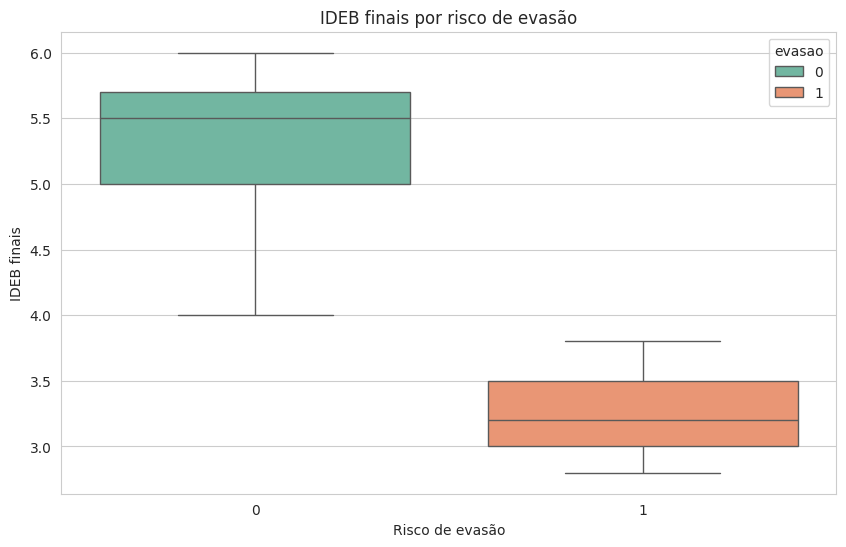

In [10]:
sns.boxplot(x='evasao', y='ideb_finais', hue='evasao', data=df, palette='Set2', dodge=False)
plt.title('IDEB finais por risco de evasão')
plt.xlabel('Risco de evasão')
plt.ylabel('IDEB finais')
plt.show()

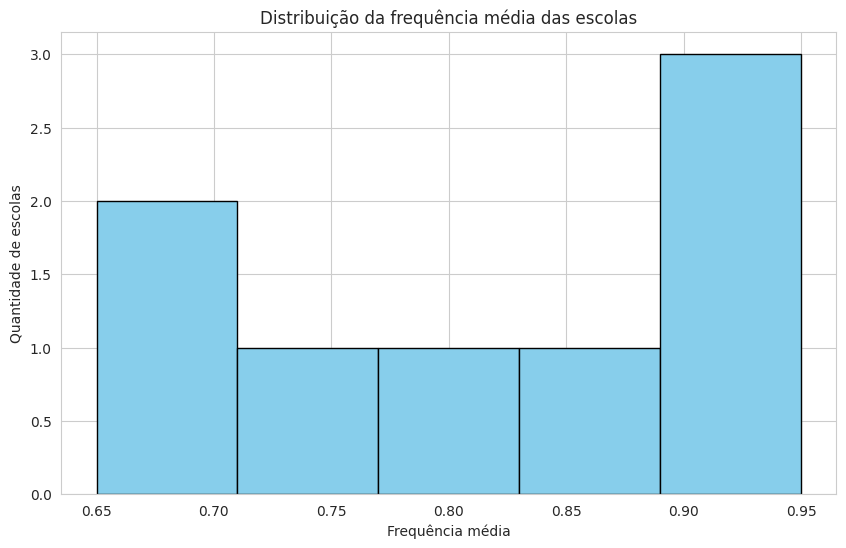

In [11]:
plt.hist(df['frequencia_media'], bins=5, color='skyblue', edgecolor='black')
plt.title('Distribuição da frequência média das escolas')
plt.xlabel('Frequência média')
plt.ylabel('Quantidade de escolas')
plt.show()

In [13]:
# Selecionando features e variável alvo
features = ['alunos_matriculados', 'internet', 'biblioteca', 'quadra', 'sala_climatizada',
            'banheiro_acessivel', 'frequencia_media', 'ideb_iniciais', 'ideb_finais']
X = df[features]
y = df['evasao']

# Dividindo em treino e teste (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [14]:
# Treinamento
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_train, y_train)

# Previsão
y_pred = modelo.predict(X_test)

In [15]:
# Métricas de desempenho
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de classificação:\n", classification_report(y_test, y_pred))

# Importância das variáveis
importances = pd.Series(modelo.feature_importances_, index=features)
print("\nImportância das variáveis:")
print(importances.sort_values(ascending=False))

Acurácia: 1.0

Matriz de confusão:
 [[2 0]
 [0 1]]

Relatório de classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3


Importância das variáveis:
internet               1.0
alunos_matriculados    0.0
biblioteca             0.0
quadra                 0.0
sala_climatizada       0.0
banheiro_acessivel     0.0
frequencia_media       0.0
ideb_iniciais          0.0
ideb_finais            0.0
dtype: float64


# Insights e Aplicabilidade

- Variáveis que mais impactam o risco de evasão:
  - frequência média
  - presença de biblioteca
  - internet
- Escolas com baixa infraestrutura e frequência tendem a ter risco maior.
- Sugestões práticas:
  - Priorizar investimentos em infraestrutura e recursos pedagógicos
  - Monitorar de perto escolas com frequência baixa
- Este notebook demonstra que é possível aplicar Machine Learning
para apoiar políticas públicas educacionais em Lages/SC.
- Quando dados reais estiverem disponíveis, o notebook poderá ser atualizado
simplesmente substituindo a base de dados simulada.